### Non-hierarchical clustering (kmeans) using two columns  

#### Import libraries  

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### Parameters  

In [6]:
csv_in = '../ai-05/ai-05/iris.csv'

# To show more rows and columns
pd.options.display.max_rows = 999 
pd.options.display.max_columns = 999 

#### Read CSV file  

In [7]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=2, header=0)
print(df.shape)
print(df.info())
display(df.head())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_len    150 non-null    float64
 1   sepal_width  150 non-null    float64
 2   petal_len    150 non-null    float64
 3   petal_width  150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Separate data  

In [8]:
df_data = df.loc[:, ['sepal_len', 'sepal_width']]
print(df_data.shape)
display(df_data.head())

(150, 2)


,sepal_len,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


#### Scatter plot  

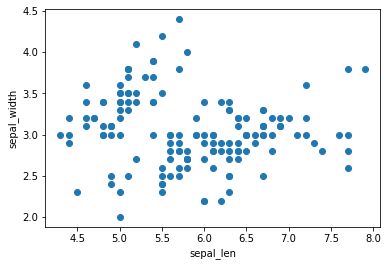

In [9]:
plt.scatter(df_data['sepal_len'], df_data['sepal_width'])
plt.xlabel('sepal_len')
plt.ylabel('sepal_width')
plt.show()

#### Execute clustering  

In [10]:
n_cls = 3
km = KMeans(n_clusters=n_cls, random_state=7)
cls = km.fit_predict(df_data)

#### See the results of clustering  

In [11]:
print(cls)
print(pd.Series(cls).value_counts())

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]
0    53
2    50
1    47
dtype: int64


#### Draw scatter plot  

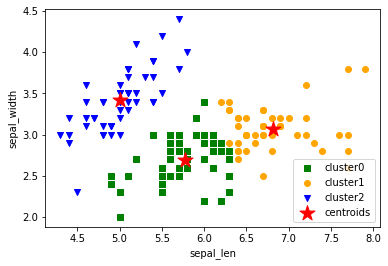

In [12]:
colors = ['green', 'orange', 'blue']
markers = ['s', 'o', 'v']
for i in range(n_cls):
    df_cls = df_data[ cls==i ]
    plt.scatter(df_cls['sepal_len'], df_cls['sepal_width'],
                c=colors[i], marker=markers[i],
                label='cluster{}'.format(i))
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*', c='red',
            label='centroids')
plt.xlabel('sepal_len')
plt.ylabel('sepal_width')
plt.legend()
plt.show()

#### Make cross table  

In [13]:
ct = pd.crosstab(df['class'], cls)
display(ct)

col_0,0,1,2
class,,,
Iris-setosa,0,0,50
Iris-versicolor,38,12,0
Iris-virginica,15,35,0


#### Using the elbow method to find the optimal number of clusters 

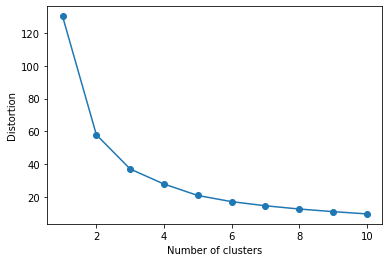

In [14]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(df_data)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()